# Deception strategies evaluation

In [ ]:
%pip install scipy
%pip install seaborn

In [96]:
import numpy as np
import os
import datetime
import yaml
import json
from dotenv import load_dotenv, dotenv_values

import scipy
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd

In [97]:
log_dir = os.path.join('/', 'logs','exper', "notebook_dql_debug_with_tinymicro")

load_dotenv(override=True)
env_config = json.loads(json.dumps(dotenv_values()))


## Retrieving data from file with deteciton points results

In [98]:
max_episode_steps = 50
# log_results = os.getenv("LOG_RESULTS", 'False').lower() in ('true', '1', 't')
# gymid = os.getenv("GYMID", 'CyberBattleTinyMicro-v0')
# log_level = os.getenv('LOG_LEVEL', "info")
# iteration_count = None
# eval_episode_count = int(os.getenv('EVAL_EPISODE_COUNT', 0))
# training_episode_count = None
# train_while_exploit = False
# exploit_train = "exploit_train"   # "exploit_manual"

# log_dir = '/root/logs/exper/' + "notebook_dql_debug_with_tinymicro"
# # convert the datetime object to string of specific format
# log_level = os.getenv('LOG_LEVEL', "info")
# checkpoint_name = 'manual' if os.getenv('CHECKPOINT', 'manual').lower() in ('manual') else os.environ['CHECKPOINT'].lower()
iteration_count = None
# checkpoint_date = None

In [99]:
# # %%
iteration_count = max_episode_steps if iteration_count is None else iteration_count
# os.environ['TRAINING_EPISODE_COUNT'] = os.getenv('TRAINING_EPISODE_COUNT', '3000') if training_episode_count is None else str(training_episode_count)
# training_episode_count = int(os.environ['TRAINING_EPISODE_COUNT'])
# checkpoint_date = os.getenv('CHECKPOINT_DATE', '20230124_085534')

# # checkpoint_date = '20230126_233444'

# datetime_str = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
# checkpoint_dir = os.path.join("/root/logs/exper/" + "notebook_dql_debug_with_tinymicro", gymid, checkpoint_date)
# assert checkpoint_name in ('best', 'manual') or checkpoint_name.isnumeric(), f"Checkpoint name {checkpoint_name} is not manual, best or stepsdone number"

# os.environ['LOG_DIR'] = log_dir
# os.environ['LOG_RESULTS'] = str(log_results).lower()

In [100]:
all_expers = {key:[value for value in os.listdir(os.path.join(log_dir, key))] for key in os.listdir(log_dir)}
# expers = {"CyberBattleTinyMicro-v1":["20230225_232921"], "CyberBattleTinyMicro-v100":["20230127_105321", "20230127_105636"]}
all_expers

{'CyberBattleTinyMicro-v1': ['20230308_180950',
  '20230225_232921',
  '20230308_221855',
  '20230226_120702',
  '20230309_002305',
  '20230226_182453',
  '20230226_141248',
  '20230308_160214',
  '20230226_075238',
  '20230309_022820',
  '20230226_161946',
  '20230226_223520',
  '20230226_013617',
  '20230226_203032',
  '20230309_043353',
  '20230226_034134',
  '20230226_054633',
  '20230225_174102',
  '20230225_130137',
  '20230225_150622',
  '20230308_201442',
  '20230308_135807',
  '20230226_095932',
  '20230225_194508'],
 'CyberBattleTinyMicro-v3': ['20230225_184307',
  '20230225_160829',
  '20230308_170615',
  '20230226_085613',
  '20230308_150013',
  '20230226_003210',
  '20230225_140416',
  '20230309_053548',
  '20230226_110322',
  '20230226_172214',
  '20230308_232110',
  '20230226_131008',
  '20230309_012541',
  '20230226_064939',
  '20230226_151649',
  '20230308_191308',
  '20230226_044350',
  '20230225_204733',
  '20230308_211655',
  '20230309_033126',
  '20230226_213327',


In [101]:
csr_type_mapping = {'indices': 0, 'indptr': 1, 'eplength': 2}
all_detection_points_results = {}
for gymid in all_expers:
    for date in all_expers[gymid]:
        checkpoint_dir = os.path.join(log_dir, gymid, date)
        csr_matrix = np.load(os.path.join(checkpoint_dir, 'training', 'detection_points_results.npz'))
        
        exper_name = gymid + '.' + date
        all_detection_points_results[exper_name] = {}
        for key in csr_matrix:
            name, data_type = '_'.join(key.split('_')[:-1]), key.split('_')[-1]
            all_detection_points_results[exper_name][name] = all_detection_points_results[exper_name].get(name, dict())
            all_detection_points_results[exper_name][name].update({data_type: csr_matrix[key]})
            

# all_detection_points_dict = {}
# for exper in all_detection_points_results:
#     for k in all_detection_points_results[exper].keys():
#         name, data_type = '_'.join(k.split('_')[:-1]), k.split('_')[-1]
#         all_detection_points_dict[exper + '.' + name] = all_detection_points_dict.get(exper + '.' + name, dict())
#         all_detection_points_dict[exper + '.' + name].update({data_type: all_detection_points_results[exper][k]})

expers = {key: [all_expers[key][-1]] for key in all_expers}
detection_points_results = {exper_name: value for exper_name, value in all_detection_points_results.items() 
                         if exper_name.split('.')[1] in ''.join(map(lambda x: ''.join(x), expers.values()))}

## Appendix

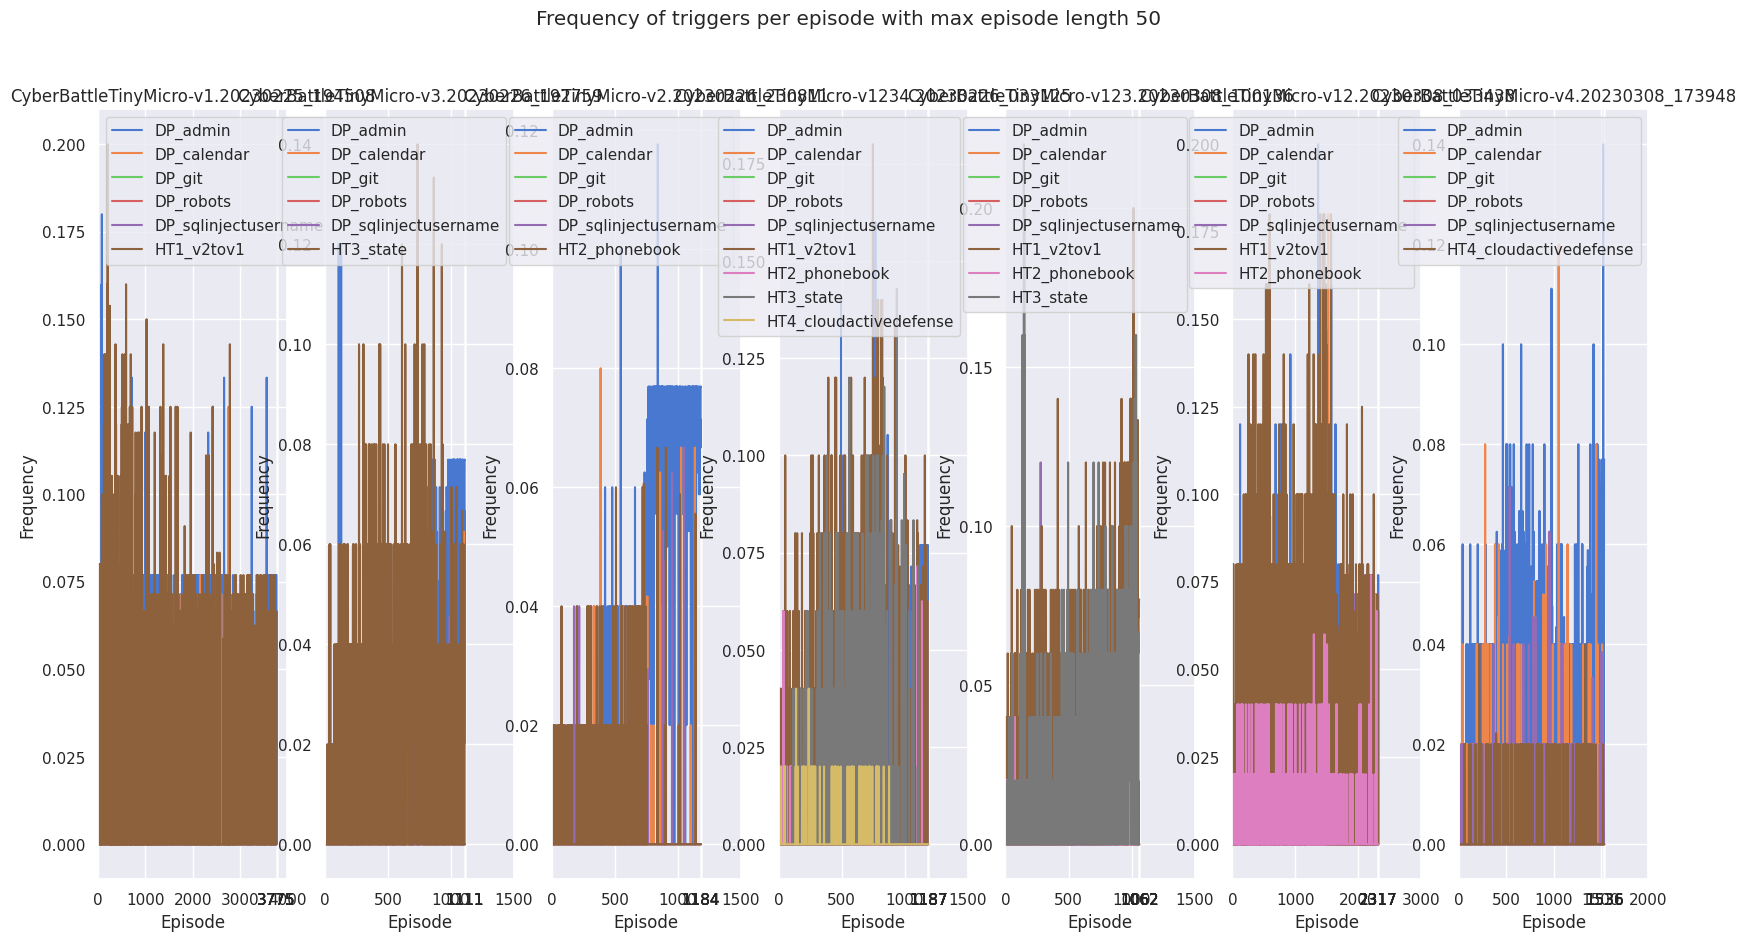

In [38]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
nrows, ncols=max(len(expers[gymid]) for gymid in expers),len(expers)
axes = {}

detection_points_dict = 
fig = plt.figure(figsize=(20, 10))
for name in detection_points_dict:
    gymid, date, detection_point = name.split('.')
    j, i = list(expers.keys()).index(gymid), expers[gymid].index(date)
    if (i, j) not in axes:
        ax = fig.add_subplot(nrows, ncols, i*ncols + j + 1)
        axes[(i, j)] = ax
    else:
        ax = axes[(i, j)]
    n_occurencies = len(detection_points_dict[name]['indices'])
    N = len(detection_points_dict[name]['eplength'])

        n_occur_per_episode = np.ravel(np.array(all_occur.sum(axis=1)))
        # only episodes which have nonzero inclusions
        if freq_not_count:
            freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0] / \
                eplength[-n_last_episodes:][n_occur_per_episode[-n_last_episodes:] > 0]
        else:
            freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0]
        freq_occur_per_episode = freq_occur_per_episode if len(freq_occur_per_episode) else [0]*n_epis
        ax.bar(w_M / 2 + dp_index / N + exper_index * w_M, freq_occur_per_episode.mean(), width=w_M, color=color[exper_index], align='center', label=exper_name)

    all_occur = scipy.sparse.csr_matrix(([True] * n_occurencies, detection_points_dict[name]['indices'], detection_points_dict[name]['indptr']), shape=(N, iteration_count))
    n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
    freq_occur_per_episode = n_occur_per_episode / detection_points_dict[name]['eplength']
    ax.plot(np.arange(len(n_occur_per_episode)), freq_occur_per_episode, label=detection_point)
    ax.set_xlabel("Episode")
    ax.set_ylabel("Frequency")
    #ax.set_ylim(0, max(list(freq_occur_per_episode) + [0] + ax.get_ylim()[1]))
    eplength = len(detection_points_dict[name]['eplength'])
    ax.set_xlim(0, eplength + 1)
    ax.set_title(gymid + '.' + date)
    extraxticks = [len(detection_points_dict[name]['eplength'])]
    ax.set_xticks(list(ax.get_xticks()) + extraxticks)
    ax.legend()
_ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")

In [95]:
all_expers.keys()

dict_keys(['CyberBattleTinyMicro-v1', 'CyberBattleTinyMicro-v3', 'CyberBattleTinyMicro-v2', 'CyberBattleTinyMicro-v1234', 'CyberBattleTinyMicro-v123', 'CyberBattleTinyMicro-v12', 'CyberBattleTinyMicro-v4'])

1


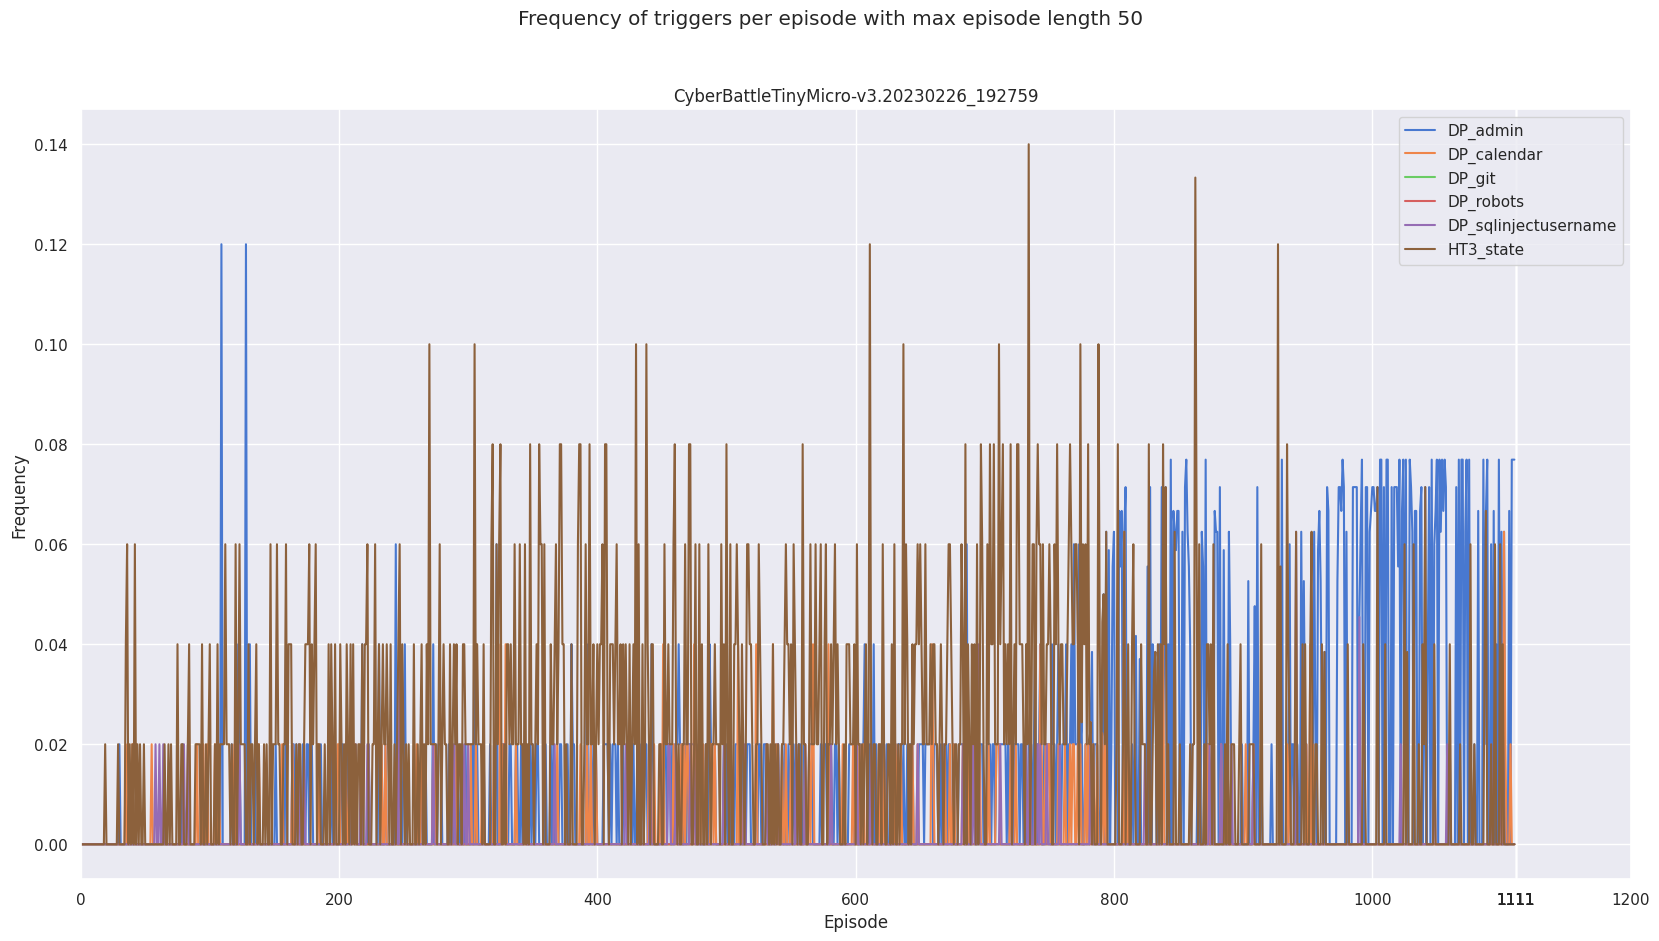

In [94]:
expers = {key: [all_expers[key][-1]] for key in all_expers if 'v3' in key}
detection_points_results = {exper_name: value for exper_name, value in all_detection_points_results.items() 
                         if exper_name.split('.')[1] in ''.join(map(lambda x: ''.join(x), expers.values()))}

print(len(detection_points_results))

sns.set(style="darkgrid", palette="muted", color_codes=True)
nrows, ncols=max(len(expers[gymid]) for gymid in expers),len(expers)
axes = {}

fig = plt.figure(figsize=(20, 10))
for exper_name, dp_name in detection_points_results.items():
    for detection_point in dp_name:
        gymid, date = exper_name.split('.')
        j, i = list(expers.keys()).index(gymid), expers[gymid].index(date)
        if (i, j) not in axes:
            ax = fig.add_subplot(nrows, ncols, i*ncols + j + 1)
            axes[(i, j)] = ax
        else:
            ax = axes[(i, j)]
        csr_matrix_lists = detection_points_results[exper_name][detection_point]
        n_occurencies = len(csr_matrix_lists['indices'])
        N = len(csr_matrix_lists['eplength'])

        # n_episodes x 50: 1

        all_occur = scipy.sparse.csr_matrix(([True] * n_occurencies, csr_matrix_lists['indices'], csr_matrix_lists['indptr']), shape=(N, iteration_count))
        n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
        freq_occur_per_episode = n_occur_per_episode / csr_matrix_lists['eplength']
        ax.plot(np.arange(len(n_occur_per_episode)), freq_occur_per_episode, label=detection_point)
        ax.set_xlabel("Episode")
        ax.set_ylabel("Frequency")
        #ax.set_ylim(0, max(list(freq_occur_per_episode) + [0] + ax.get_ylim()[1]))
        eplength = len(csr_matrix_lists['eplength'])
        ax.set_xlim(0, eplength)
        ax.set_title(gymid + '.' + date)
        extraxticks = [len(csr_matrix_lists['eplength'])]
        ax.set_xticks(list(ax.get_xticks()) + extraxticks)
        ax.legend()
    _ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")

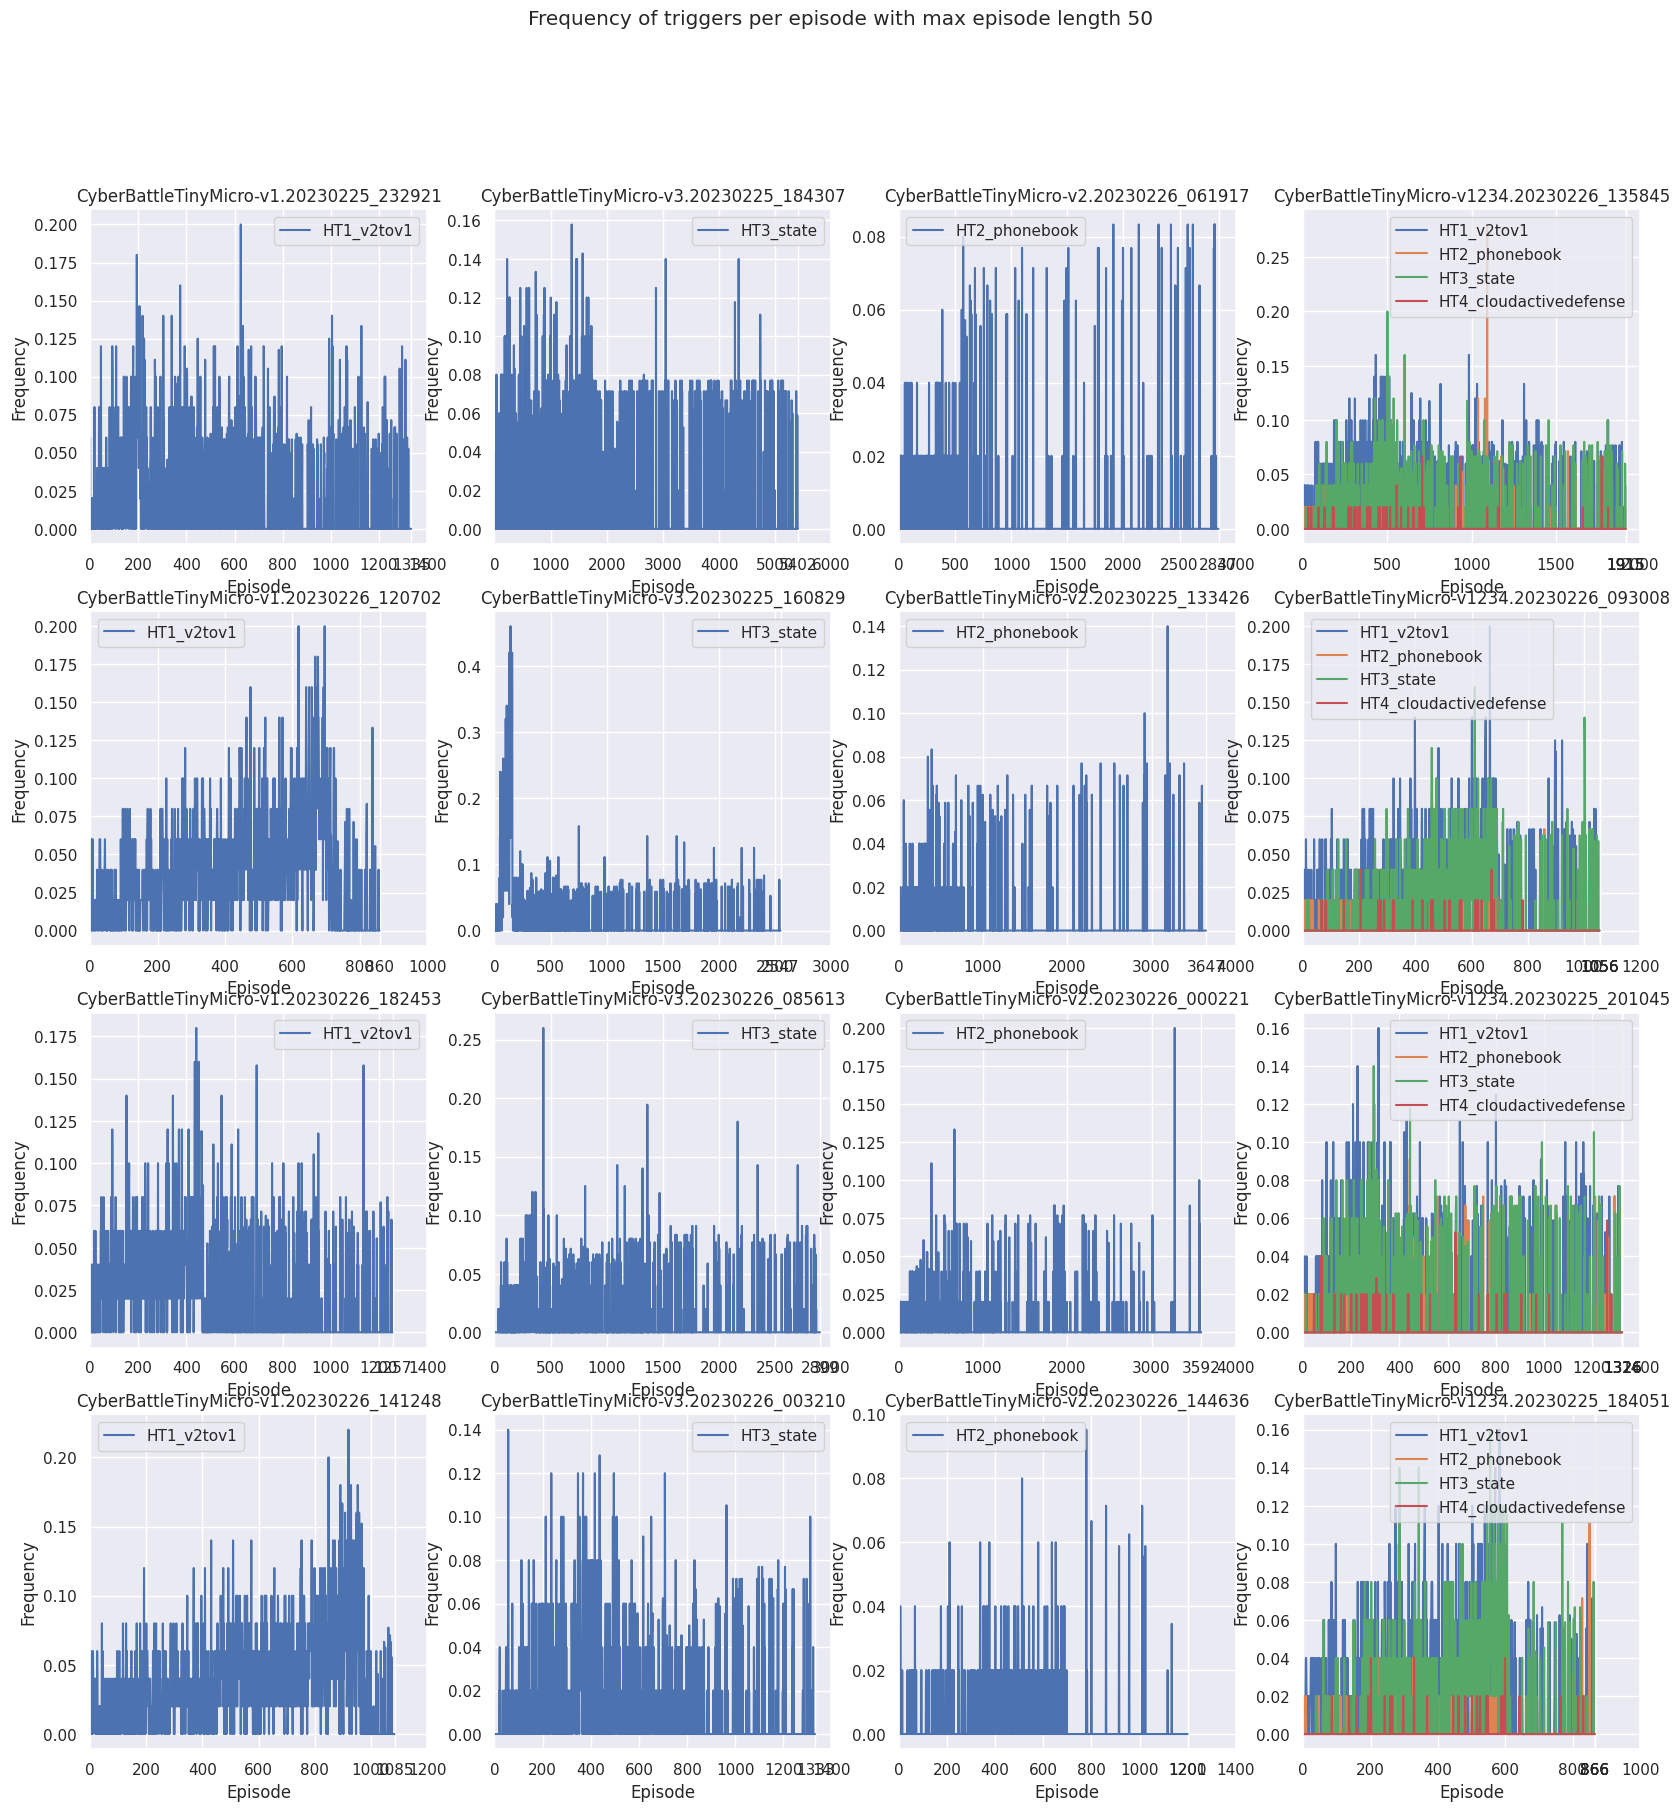

In [200]:
cur_expers = {key: [date for j, date in enumerate(all_expers[key]) if j <= 3] for i, key in enumerate(all_expers.keys()) if i <= 3 } # {"CyberBattleTinyMicro-v1":["20230127_105836"], "CyberBattleTinyMicro-v100":["20230127_105321", "20230127_105636"]}

detection_points_npz = {}
for gymid in cur_expers:
    for date in cur_expers[gymid]:
        checkpoint_dir = os.path.join(log_dir, gymid, date)
        detection_points_npz[gymid + '.' + date] = np.load(os.path.join(checkpoint_dir, 'training',
                                                                            'detection_points_results.npz'))

detection_point_names = set()
detection_points_indices = {}
for exper in detection_points_npz:
    for k in detection_points_npz[exper].keys():
        ht_dp_name, csr_index_type = '_'.join(k.split('_')[:-1]), k.split('_')[-1]
        if not include_dps and "dp" in ht_dp_name.lower():
            continue
        detection_point_names |= {ht_dp_name}
        detection_points_indices[exper + '.' + ht_dp_name] = detection_points_indices.get(exper + '.' + ht_dp_name, dict())
        detection_points_indices[exper + '.' + ht_dp_name].update({csr_index_type: detection_points_npz[exper][k]})
dp_names = sorted(list((detection_point_names)))
exper_names = sorted(list(detection_points_npz.keys()))

nrows, ncols=max(len(cur_expers[gymid]) for gymid in cur_expers), len(cur_expers)
axes = {}

fig = plt.figure(figsize=(20, 20))
for name in detection_points_indices:
    gymid, date, detection_point = name.split('.')
    j, i = list(cur_expers.keys()).index(gymid), cur_expers[gymid].index(date)
    if (i, j) not in axes:
        ax = fig.add_subplot(nrows, ncols, i*ncols + j + 1)
        axes[(i, j)] = ax
    else:
        ax = axes[(i, j)]
    n_occurencies = len(detection_points_indices[name]['indices'])
    N = len(detection_points_indices[name]['eplength'])

    # n_episodes x 50: 1

    all_occur = scipy.sparse.csr_matrix(([True] * n_occurencies, detection_points_indices[name]['indices'], detection_points_indices[name]['indptr']), shape=(N, iteration_count))
    n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
    freq_occur_per_episode = n_occur_per_episode / detection_points_indices[name]['eplength']
    ax.plot(np.arange(len(n_occur_per_episode)), freq_occur_per_episode, label=detection_point)
    ax.set_xlabel("Episode")
    ax.set_ylabel("Frequency")

    eplength = len(detection_points_indices[name]['eplength'])
    ax.set_xlim(0, eplength)
    ax.set_title(gymid + '.' + date)
    extraxticks = [len(detection_points_indices[name]['eplength'])]
    ax.set_xticks(list(ax.get_xticks()) + extraxticks)
    ax.legend()
_ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")

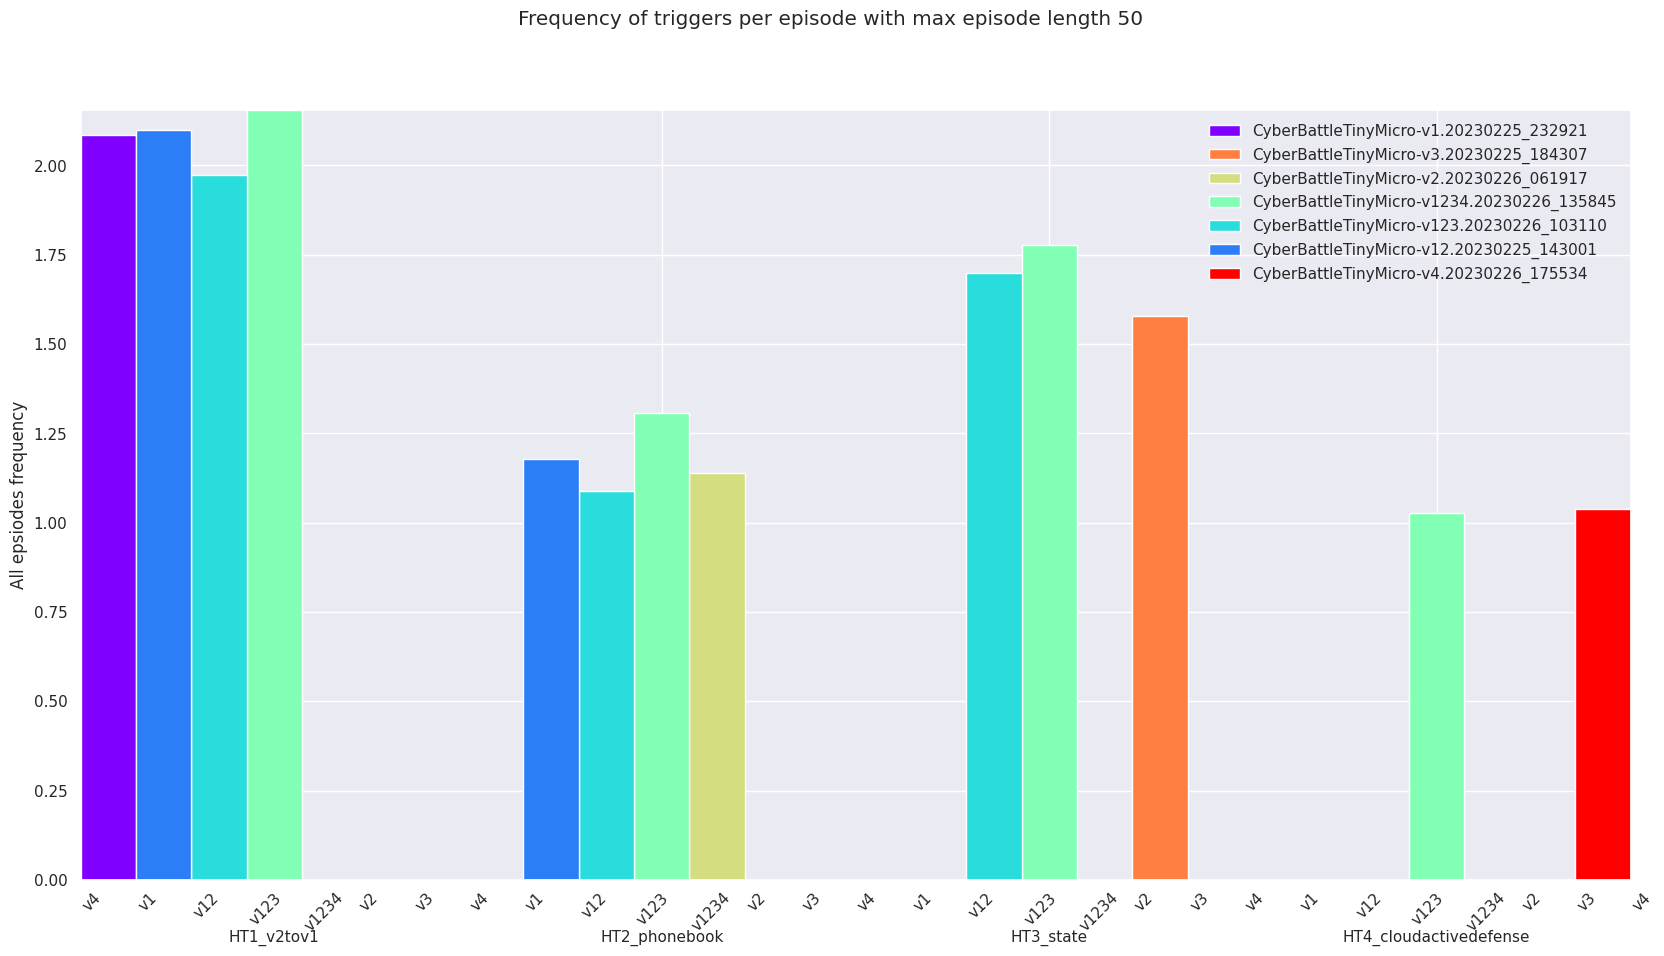

In [ ]:
sns.set(style="darkgrid", color_codes=True) # 
# nrows, ncols = max(len(expers[gymid]) for gymid in expers), len(expers)
# axes = {}
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

N, M = len(dp_names), len(exper_names)
w_N = 1/N
w_M = w_N/M

color = cm.rainbow(np.linspace(0, 1, M))
n_last_episodes = 0 # 50 # for all episodes (=0)
freq_not_count = False
for exper_ht_dp_name in detection_points_indices:
    # construct axes in fig, and log its index (i, j) inside axes
    gymid, date, detection_point = exper_ht_dp_name.split('.')
    exper_name = gymid + '.' + date
    exper_index, dp_index = exper_names.index(exper_name), dp_names.index(detection_point)
    # j, i = list(expers.keys()).index(gymid), expers[gymid].index(date) # get indices of "gymid: date" inside (key, val) pair 
    # if (i, j) not in axes:
    #     ax = fig.add_subplot(nrows, ncols, i * ncols + j + 1)
    #     axes[(i, j)] = ax
    # else:
    #     ax = axes[(i, j)]
    
    n_nonzero = len(detection_points_indices[exper_ht_dp_name]['indices'])
    N_episodes = len(detection_points_indices[exper_ht_dp_name]['eplength'])
    # n_episodes x 50
    all_occur = scipy.sparse.csr_matrix(([True] * n_nonzero, detection_points_indices[exper_ht_dp_name]['indices'], 
                                         detection_points_indices[exper_ht_dp_name]['indptr']), 
                                         shape=(N_episodes, max_episode_steps))
    n_occur_per_episode = np.array(all_occur.sum(axis=1)).reshape(-1)
    # only episodes which have nonzero inclusions
    if freq_not_count:
        freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0] / \
            detection_points_indices[exper_ht_dp_name]['eplength'][-n_last_episodes:][n_occur_per_episode[-n_last_episodes:] > 0]
    else:
        freq_occur_per_episode = (n_occur_per_episode[-n_last_episodes:])[n_occur_per_episode[-n_last_episodes:] > 0]
    freq_occur_per_episode = freq_occur_per_episode if len(freq_occur_per_episode) else [0, 0, 0]
    ax.bar(w_M / 2 + dp_index / N + exper_index * w_M, freq_occur_per_episode.mean(), width=w_M, color=color[exper_index], align='center', label=exper_name)
    # ax.plot(np.arange(len(n_occur_per_episode))[n_occur_per_episode > 0], freq_occur_per_episode, label=detection_point)
# ax.set_xlabel("Episode")
ax.set_ylabel(f"Last {n_last_episodes} "*(n_last_episodes != 0) + (not n_last_episodes)*"All "+ "epsiodes frequency")
    # ax.set_ylim(0, max(list(freq_occur_per_episode) + [0] + ax.get_ylim()[1]))
    # eplength = len(detection_points_indices[exper_ht_dp_name]['eplength'])
    # ax.set_xlim(0, eplength)
    # ax.set_title(gymid + '.' + date)
# extraxticks = [len(detection_points_indices[exper_ht_dp_name]['eplength'])]
# ax.set_xticks(list(ax.get_xticks()) + extraxticks)
ax.xaxis.set_major_locator(plt.FixedLocator(np.linspace(0, 1, N+1)[:-1] + w_N/2))
ax.xaxis.set_major_formatter(plt.FixedFormatter(dp_names))
ax.xaxis.set_minor_locator(plt.FixedLocator(np.linspace(0, 1, N*M+1))) # - w_M/2))
ax.xaxis.set_minor_formatter(plt.FuncFormatter(lambda val, tick_number: exper_names[(tick_number - 1) % M].split('-')[1].split('.')[0]))
ax.tick_params(axis='x', pad=30)
plt.setp( ax.xaxis.get_minorticklabels(), rotation=45, ha='left')
# for tick in ax.xaxis.get_minor_ticks():
#     tick.label1.set_rotation(45)
#     tick.label1.set_rotation(45)
# plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')
ax.autoscale(tight=True)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=False)

_ = fig.suptitle(f"Frequency of triggers per episode with max episode length {max_episode_steps}")
